Linear Regression Implementation
================================

**Author:** Srikar Kalle  
**Student ID:** C00313529  

-----------
# Change Log:
-----------

| SL No. | Change Category        | Description | Duration (mins) | Difficulty (1-10) |  
|--------|------------------------|-------------|-----------------|-------------------|  
| 1      | Dataset Update         | Replaced previous dataset with Penguins dataset. | 10 | 3 |  
| 2      | Feature Engineering    | Selected numerical (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`) and categorical (`species`, `island`, `sex`) features. | 15 | 5 |  
| 3      | Preprocessing Pipeline | Standardized numerical features with `StandardScaler`. | 10 | 5 |  
| 4      | Preprocessing Pipeline | Encoded categorical features with `OneHotEncoder`. | 10 | 5 |  
| 5      | Preprocessing Pipeline | Combined all preprocessing steps using `ColumnTransformer`. | 15 | 6 |  
| 6      | Model Update           | Removed Ridge Regression and used plain Linear Regression. | 5 | 3 |  
| 7      | Model Evaluation       | Computed RMSE and R² scores for performance evaluation. | 10 | 5 |  
| 8      | Visualization          | Added residual plot to display model errors. | 10 | 4 |  
| 9      | Model Saving           | Serialized trained model using `joblib.dump()`. | 5 | 3 |  
| 10     | Initial Enhancements   | Improved data handling and missing value removal. | 10 | 4 |  
| 11     | Train-Test Split       | Ensured proper 80/20 train-test split. | 5 | 3 |  
| 12     | Structured Pipeline    | Used structured pipeline for model training. | 15 | 6 |  
| 13     | Evaluation Metrics     | Added better model evaluation metrics. | 10 | 5 |  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# Load Penguins dataset
penguins = sns.load_dataset("penguins").dropna()

In [3]:
# Define features and target
X = penguins.drop(columns=['body_mass_g'])
y = penguins['body_mass_g']

In [4]:
# Identify numerical and categorical features
num_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
cat_features = ['species', 'island', 'sex']

In [5]:
# Preprocessing pipeline
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [6]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [7]:
# Hyperparameter tuning - removed Ridge regularization

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['species', 'island',
                                                   'sex'])])),
                ('regressor', LinearRegression())])

In [8]:
# Predictions
y_pred = model.predict(X_test)

In [9]:
# Model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

RMSE: 255.75
R² Score: 0.90


In [10]:
# Save model
joblib.dump(model, 'linear_regression_penguins.pkl')

['linear_regression_penguins.pkl']

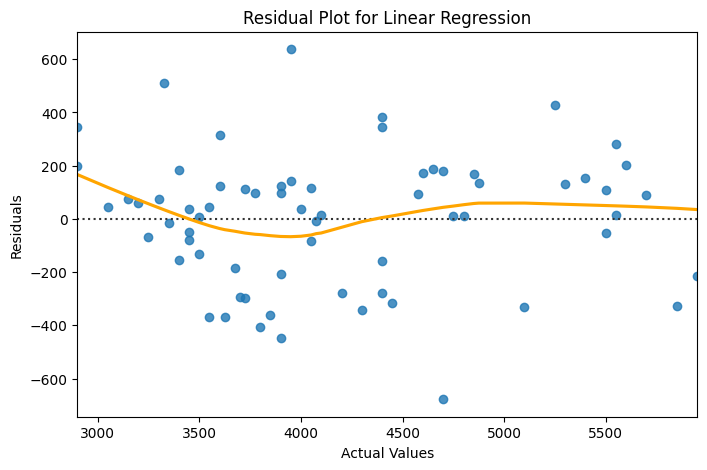

In [13]:
# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'orange'})
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.show()